#### 算法原理与可视化

In [39]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# 定义辅助函数
def loadDataSet():
    """加载并解析 testSet.txt 数据。"""
    dataMat = []
    labelMat = []
    with open('testSet.txt') as fr:
        for line in fr.readlines():
            lineArr = line.strip().split()
            # X0 设为 1.0，方便计算截距
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    """Sigmoid 函数"""
    # 使用 np.clip 防止指数运算溢出
    inX = np.clip(inX, -700, 700)
    return 1.0 / (1 + np.exp(-inX))

In [41]:
# 定义梯度上升优化算法
def gradAscent(dataMatIn, classLabels):
    """批量梯度上升算法"""
    dataMatrix = np.array(dataMatIn)
    # 将标签列表转换为列向量
    labelMat = np.array(classLabels).reshape(-1, 1)
    m, n = np.shape(dataMatrix)
    alpha = 0.001  # 学习率
    maxCycles = 500  # 迭代次数
    weights = np.ones((n, 1)) # 初始化权重

    for k in range(maxCycles):
        # 核心公式: 矩阵乘法计算预测值 h
        h = sigmoid(dataMatrix @ weights)
        # 计算误差
        error = (labelMat - h)
        # 更新权重
        weights = weights + alpha * dataMatrix.T @ error
        
    return weights

In [42]:
# 定义可视化函数
def plotBestFit(weights):
    """可视化数据集和逻辑回归的最佳拟合直线"""
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    
    # 将数据点按类别分组
    xcord1, ycord1 = [], []
    xcord2, ycord2 = [], []
    for i in range(len(labelMat)):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
            
    # 创建画布并绘制散点图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s', label='类别 1')
    ax.scatter(xcord2, ycord2, s=30, c='green', label='类别 0')
    
    # 绘制决策边界线
    x = np.arange(-3.0, 3.0, 0.1)
    # 方程: w0 + w1*x + w2*y = 0  =>  y = (-w0 - w1*x) / w2
    y = (-weights[0] - weights[1] * x) / weights[2]
    
    ax.plot(x, y.flatten())
    
    # 设置图表中文标题和标签
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.title('逻辑回归最佳拟合直线')
    plt.xlabel('特征 X1')
    plt.ylabel('特征 X2')
    plt.legend()
    plt.show()

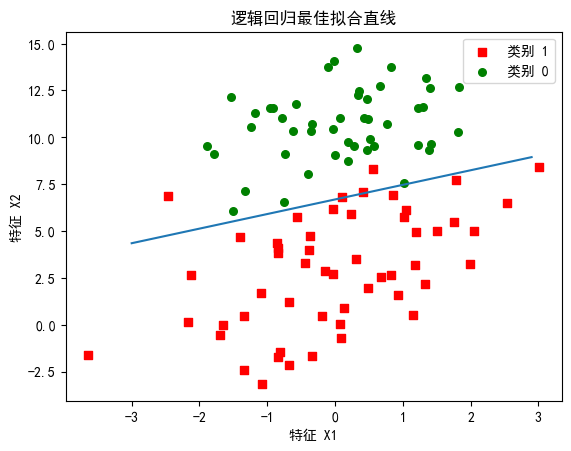

In [43]:
# 运行并查看可视化结果
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
plotBestFit(weights)

#### 实战马疝病数据预测

In [44]:
# 定义改进的随机梯度上升算法
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    """改进的随机梯度上升算法"""
    dataMatrix = np.array(dataMatrix)
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)
    
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # 1. 动态学习率
            alpha = 4 / (1.0 + j + i) + 0.0001
            # 2. 随机选取样本
            rand_idx_pos = int(np.random.uniform(0, len(dataIndex)))
            rand_idx_val = dataIndex[rand_idx_pos]
            
            # 计算并更新
            h = sigmoid(np.sum(dataMatrix[rand_idx_val] * weights))
            error = classLabels[rand_idx_val] - h
            weights = weights + alpha * error * dataMatrix[rand_idx_val]
            
            # 删除已用过的索引
            del(dataIndex[rand_idx_pos])
            
    return weights

In [45]:
# 定义分类与测试函数
def classifyVector(inX, weights):
    """根据权重对输入向量进行分类"""
    prob = sigmoid(np.sum(inX * weights))
    return 1.0 if prob > 0.5 else 0.0

def colicTest():
    """单次训练和测试马疝病数据"""
    trainingSet, trainingLabels = [], []
    with open('horseColicTraining.txt') as frTrain:
        for line in frTrain.readlines():
            currLine = line.strip().split()
            lineArr = [float(currLine[i]) for i in range(21)]
            trainingSet.append(lineArr)
            trainingLabels.append(float(currLine[21]))

    # 训练模型，迭代1000次以获得更好的效果
    trainWeights = stocGradAscent1(trainingSet, trainingLabels, 1000)
    
    errorCount = 0
    numTestVec = 0
    with open('horseColicTest.txt') as frTest:
        for line in frTest.readlines():
            numTestVec += 1
            currLine = line.strip().split()
            lineArr = [float(currLine[i]) for i in range(21)]
            prediction = classifyVector(np.array(lineArr), trainWeights)
            if int(prediction) != int(currLine[21]):
                errorCount += 1
                
    errorRate = float(errorCount) / numTestVec
    print(f"本次测试的错误率是: {errorRate:.4f}")
    return errorRate

def multiTest():
    """多次测试并计算平均错误率"""
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
        
    avgErrorRate = errorSum / float(numTests)
    print(f"\n在 {numTests} 次迭代后, 平均错误率是: {avgErrorRate:.4f}")

In [46]:
# 运行最终预测实验
multiTest()

本次测试的错误率是: 0.3134
本次测试的错误率是: 0.2836
本次测试的错误率是: 0.2836
本次测试的错误率是: 0.4179
本次测试的错误率是: 0.2836
本次测试的错误率是: 0.6567
本次测试的错误率是: 0.2687
本次测试的错误率是: 0.3433
本次测试的错误率是: 0.2687
本次测试的错误率是: 0.2836

在 10 次迭代后, 平均错误率是: 0.3403
